In [4]:
import pandas as pd

df = pd.read_csv("Fashion_Retail_Sales.csv")
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [6]:
#步驟一 資料清理
#轉換日期格式
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])
df.dtypes

Customer Reference ID             int64
Item Purchased                   object
Purchase Amount (USD)           float64
Date Purchase            datetime64[ns]
Review Rating                   float64
Payment Method                   object
dtype: object

In [7]:
#建立月份欄位
df['Month'] = df['Date Purchase'].dt.to_period('M')
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method,Month
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card,2023-02
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card,2023-07
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash,2023-03
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash,2023-03
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash,2022-11


In [8]:
#檢查缺失值
df.isnull().sum() 

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
Month                      0
dtype: int64

In [22]:
#刪除缺失值
df_cleaned = df.dropna(subset = ['Purchase Amount (USD)','Review Rating'])
df = df_cleaned
#確保金額為float
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'], errors='coerce')

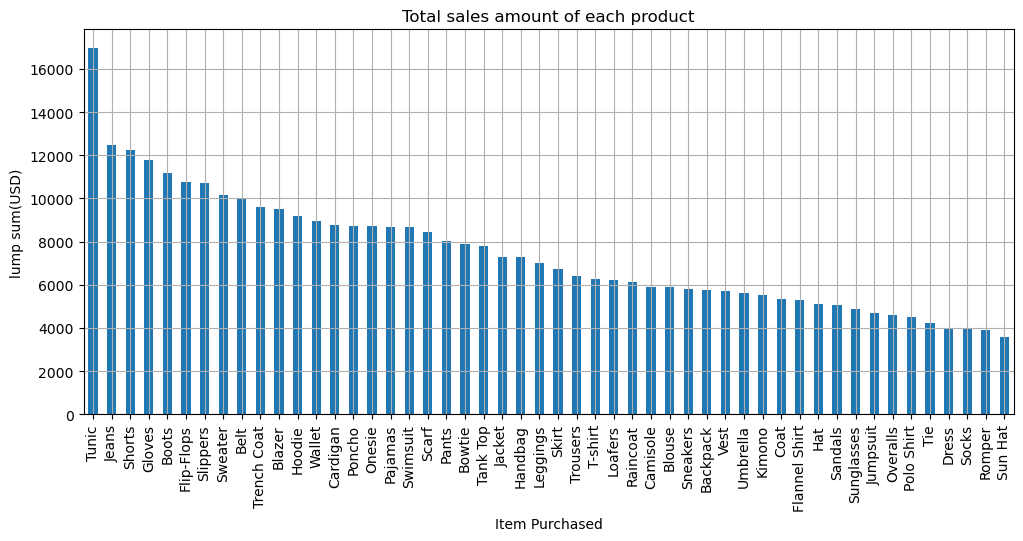

In [27]:
#步驟二 各商品銷售額總額
import matplotlib.pyplot as plt

item_sales = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending = False)
item_sales.plot(kind = 'bar', figsize = (12,5), title = 'Total sales amount of each product')
plt.ylabel('lump sum(USD)')
plt.grid(True)
plt.show()

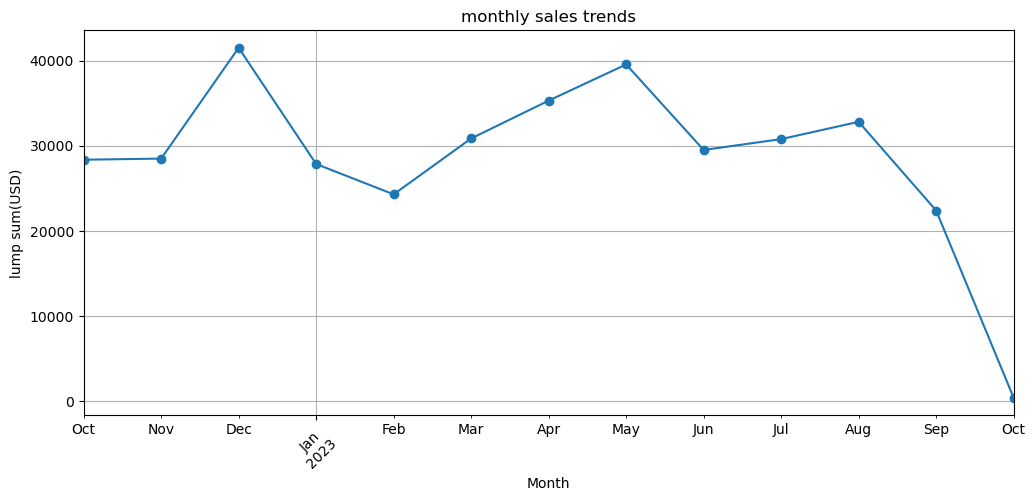

In [28]:
#步驟三 每月銷售趨勢
monthly_sales = df.groupby('Month')['Purchase Amount (USD)'].sum()
monthly_sales.plot(kind = 'line', marker = 'o', figsize = (12,5), title = 'monthly sales trends')
plt.ylabel('lump sum(USD)')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

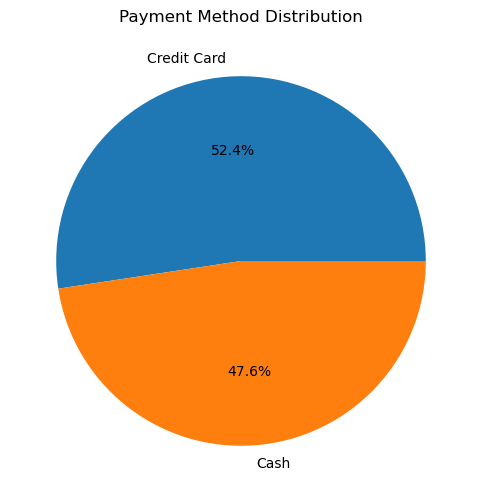

In [29]:
#步驟四 付款方式分布圖
df['Payment Method'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (6,6), title ='Payment Method Distribution')
plt.ylabel('')
plt.show

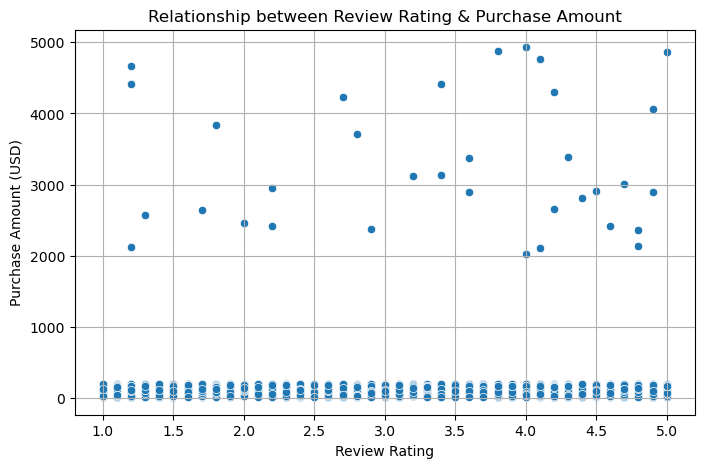

In [30]:
#步驟五 評價與金額的關聯分析
import seaborn as sns

plt.figure(figsize = (8,5))
sns.scatterplot(data = df, x = 'Review Rating', y = 'Purchase Amount (USD)')
plt.title('Relationship between Review Rating & Purchase Amount')
plt.grid(True)
plt.show()